In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
import cv2
import matplotlib.pyplot as plt

Mounted at /content/drive


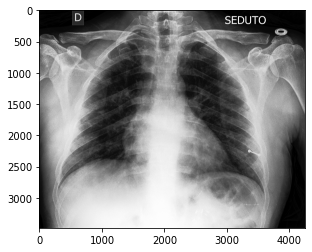

In [2]:
image_dir=('/content/drive/MyDrive/Covid19-dataset/train/Covid/01.jpeg')
image=cv2.imread(image_dir)
plt.imshow(image)

In [ ]:
print(image.shape)

(3480, 4248, 3)


**1. Resizing Image**

(250, 250, 3)


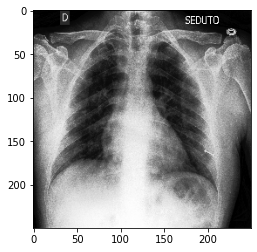

In [ ]:
resized_image=cv2.resize(image,(250,250))
print(resized_image.shape)
plt.imshow(resized_image)

**2.Rescaling**

Data Type: uint8
MIn: 0
Max: 255
Min: 0.000, Max: 1.000


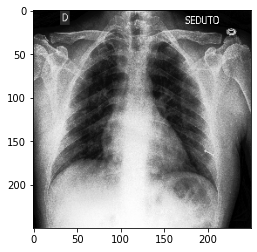

In [ ]:
#confirm the pixel range
import numpy as np

print('Data Type:',  resized_image.dtype)
print('MIn:',  resized_image.min())
print('Max:',  resized_image.max())
pixels = np.asarray(resized_image)
#convert from integer to float
pixels = pixels.astype('float32')
#normalize the range
pixels = pixels/255.0
#confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(),pixels.max()))
plt.imshow(pixels)

**3. Applying Filtering Method**

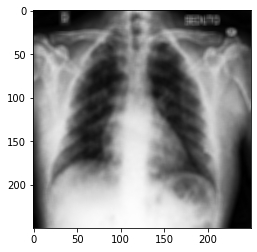

In [ ]:
Blur=cv2.blur(pixels,(5,5))
plt.imshow(Blur)

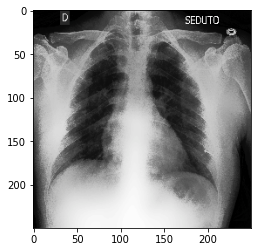

In [ ]:
noiseless_image = cv2.fastNlMeansDenoisingColored(resized_image, None, 20, 20, 1, 21)
plt.imshow(cv2.cvtColor(noiseless_image, cv2.COLOR_BGR2RGB))

** LAb-02Start-26-12-2022**

**3. Generate test and validation set-- With Image Data Generator**

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_dir=('/content/drive/MyDrive/Covid19-dataset/train')
test_dir=('/content/drive/MyDrive/Covid19-dataset/test')
val_dir=('/content/drive/MyDrive/Covid19-dataset/test')

generator_train=ImageDataGenerator(
    rescale=1./255,
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    zoom_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=True,
    vertical_flip=False,
)

generator_test=ImageDataGenerator(
    rescale=1./255,
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    zoom_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=True,
    vertical_flip=False,
)

#train_ds=generator_train.flow_from_directory(train_dir,target_size=(64,64),batch_size=32,class_mode="categorical",color_mode='grayscale')
#test_ds=generator_test.flow_from_directory(test_dir,target_size=(64,64),batch_size=32,class_mode="categorical",color_mode='grayscale')


train_ds=generator_train.flow_from_directory(train_dir,target_size=(64,64),batch_size=32,class_mode="categorical",color_mode='rgb')
test_ds=generator_test.flow_from_directory(test_dir,target_size=(64,64),batch_size=32,class_mode="categorical",color_mode='rgb')


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


**4 Create dataset--With Keras**

In [ ]:
import tensorflow as tf;

batch_size=32
img_height=64
img_width=64
data_dir=('/content/drive/MyDrive/Covid19-dataset/test')

In [ ]:
from tensorflow.python.ops.gen_batch_ops import batch
training_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

validate_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

class_names=training_ds.class_names
print(class_names)
class_names=validate_ds.class_names
print(class_names)

Found 317 files belonging to 2 classes.
Using 254 files for training.
Found 317 files belonging to 2 classes.
Using 63 files for validation.
['test', 'train']
['test', 'train']


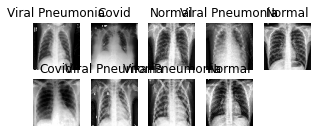

In [ ]:
plt.figure(figsize=(5, 5))
  
for images, labels in training_ds.take(1):
    for i in range(9):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

**Lab 3-9/1/2023**

**4. CNN model creating**
Created with some layer,so called sequnetial model.

**First Try With Keras Dataset**

In [5]:
import tensorflow as tf
from tensorflow.keras import layers

In [6]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(7,7),activation='relu',input_shape=(64,64,3),padding='same' ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='softmax')
])

In [ ]:
from keras.api._v2.keras import metrics
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics='categorical_accuracy')

In [ ]:
import keras
callback=keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)


In [ ]:
model.fit(training_ds,epochs=5,validation_data=validate_ds,callbacks=callback)

Epoch 1/5
8/8 [==============================] - 54s 1s/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 2/5
8/8 [==============================] - 5s 200ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 3/5
8/8 [==============================] - 6s 174ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 4/5
8/8 [==============================] - 4s 144ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000


**Second Try With Image Data Generator Data**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.optimizers import Adam

In [23]:
from sklearn.metrics import classification_report

**CNN MODEL**

In [8]:
from keras.optimizers.optimizer_v1 import Optimizer
model3=Sequential()
model3.add(Conv2D(64,(7,7),input_shape=(64,64,3),padding='same',activation='relu'))
model3.add(Flatten())
model3.add(Dense(units=128,activation='relu'))
model3.add(Dense(units=3,activation='softmax'))
optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001,decay=0.0001,clipvalue=0.5)
model3.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics='categorical_accuracy')


In [10]:
history3=model3.fit(train_ds,epochs=20,validation_data=test_ds)

Epoch 1/20
8/8 [==============================] - 13s 2s/step - loss: 0.2199 - categorical_accuracy: 0.9323 - val_loss: 0.3868 - val_categorical_accuracy: 0.9091
Epoch 2/20
8/8 [==============================] - 12s 2s/step - loss: 0.2001 - categorical_accuracy: 0.9243 - val_loss: 0.6356 - val_categorical_accuracy: 0.8182
Epoch 3/20
8/8 [==============================] - 13s 2s/step - loss: 0.1577 - categorical_accuracy: 0.9482 - val_loss: 0.2987 - val_categorical_accuracy: 0.9394
Epoch 4/20
8/8 [==============================] - 14s 2s/step - loss: 0.1180 - categorical_accuracy: 0.9761 - val_loss: 0.3455 - val_categorical_accuracy: 0.8788
Epoch 5/20
8/8 [==============================] - 14s 2s/step - loss: 0.0892 - categorical_accuracy: 0.9721 - val_loss: 0.3139 - val_categorical_accuracy: 0.8788
Epoch 6/20
8/8 [==============================] - 12s 2s/step - loss: 0.0502 - categorical_accuracy: 0.9960 - val_loss: 0.2957 - val_categorical_accuracy: 0.8939
Epoch 7/20
8/8 [============

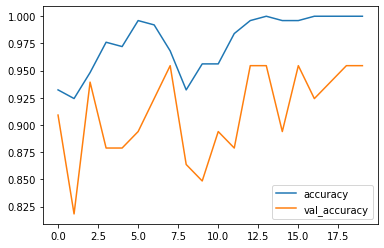

In [53]:
plt.plot(history3.history['categorical_accuracy'])
plt.plot(history3.history['val_categorical_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='lower right')

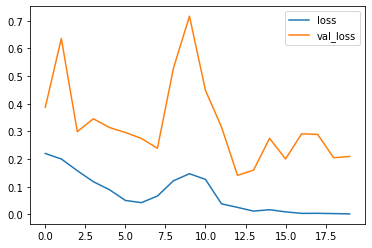

In [50]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')

3/3 [==============================] - 1s 348ms/step


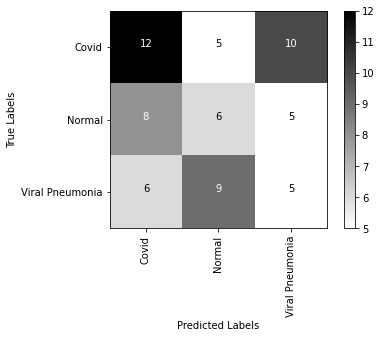

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

predY=model3.predict(test_ds)
y_pred=np.argmax(predY,axis=1)
cm=confusion_matrix(y_pred,test_ds.labels)
#print(cm)


# Define class names
class_names = ["Covid" , "Normal", "Viral Pneumonia" ]

# Plot the confusion matrix using Matplotlib
plt.imshow(cm, cmap='binary', interpolation='None')

# Add axis labels and a colorbar
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()

# Set the tick marks for the x and y axis
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

# Loop over the data and add the count to the plot
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")

# Show the plot
plt.show()

In [24]:
print(classification_report(test_ds.labels,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.46      0.45        26
           1       0.32      0.30      0.31        20
           2       0.25      0.25      0.25        20

    accuracy                           0.35        66
   macro avg       0.34      0.34      0.34        66
weighted avg       0.35      0.35      0.35        66



**LAB-04::23-01-2023**

**DENSENET MODEL**

In [11]:
pretrained_model=tf.keras.applications.DenseNet201(input_shape=(64,64,3), include_top=False, weights='imagenet', pooling='avg')
pretrained_model.trainable=False                                                   

74836368/74836368 [==============================] - 4s 0us/step


In [12]:
inputs3=pretrained_model.input
x3=tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs3=tf.keras.layers.Dense(3,activation='softmax')(x3)
model4=tf.keras.Model(inputs=inputs3,outputs=outputs3)

In [13]:
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
history4=model4.fit(train_ds,epochs=20,validation_data=test_ds)
#history=model.fit(datagen.flow(trainx,trainy,batch_size=32), validation_data=(testx,testy),epochs=20)

Epoch 1/20
8/8 [==============================] - 37s 3s/step - loss: 1.0031 - accuracy: 0.6733 - val_loss: 0.5899 - val_accuracy: 0.7273
Epoch 2/20
8/8 [==============================] - 13s 2s/step - loss: 0.2795 - accuracy: 0.8884 - val_loss: 0.5646 - val_accuracy: 0.8333
Epoch 3/20
8/8 [==============================] - 14s 2s/step - loss: 0.1644 - accuracy: 0.9482 - val_loss: 0.4473 - val_accuracy: 0.8182
Epoch 4/20
8/8 [==============================] - 14s 2s/step - loss: 0.1308 - accuracy: 0.9522 - val_loss: 0.4317 - val_accuracy: 0.8333
Epoch 5/20
8/8 [==============================] - 13s 2s/step - loss: 0.0964 - accuracy: 0.9761 - val_loss: 0.2824 - val_accuracy: 0.9091
Epoch 6/20
8/8 [==============================] - 13s 2s/step - loss: 0.0317 - accuracy: 1.0000 - val_loss: 0.3193 - val_accuracy: 0.8788
Epoch 7/20
8/8 [==============================] - 13s 2s/step - loss: 0.0356 - accuracy: 0.9960 - val_loss: 0.2783 - val_accuracy: 0.8788
Epoch 8/20
8/8 [==================

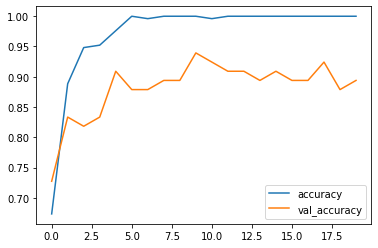

In [49]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='lower right')

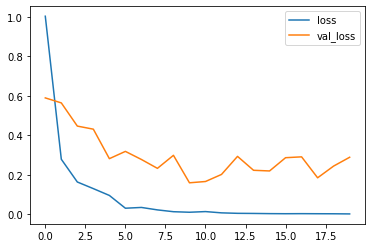

In [48]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')

3/3 [==============================] - 1s 328ms/step


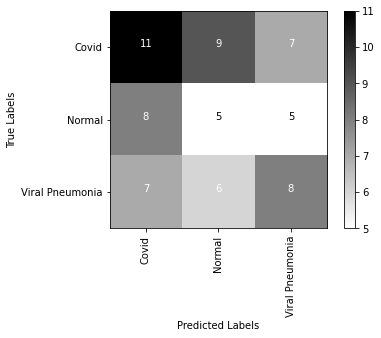

In [37]:
predY=model4.predict(test_ds)
y_pred=np.argmax(predY,axis=1)
cm1=confusion_matrix(y_pred,test_ds.labels)
#print(cm)


# Define class names
class_names = ["Covid" , "Normal", "Viral Pneumonia" ]

# Plot the confusion matrix using Matplotlib
plt.imshow(cm1, cmap='binary', interpolation='None')

# Add axis labels and a colorbar
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()

# Set the tick marks for the x and y axis
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

# Loop over the data and add the count to the plot
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        plt.text(j, i, format(cm1[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm1[i, j] > cm1.max() / 2. else "black")

# Show the plot
plt.show()

In [38]:
print(classification_report(test_ds.labels,y_pred))

              precision    recall  f1-score   support

           0       0.41      0.42      0.42        26
           1       0.28      0.25      0.26        20
           2       0.38      0.40      0.39        20

    accuracy                           0.36        66
   macro avg       0.36      0.36      0.36        66
weighted avg       0.36      0.36      0.36        66



**Home Work! After Lab 4::VGG19 Model applying**

**VGG MODEL**

In [31]:
import keras

In [32]:
vgg19 = keras.applications.vgg19
vgg_model5 = vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(64,64,3))
for layer in vgg_model5.layers: 
    layer.trainable = False
x = keras.layers.Flatten()(vgg_model5.output)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
predictions = keras.layers.Dense(3, activation='softmax')(x)
model5 = keras.models.Model(inputs=vgg_model5.input, outputs=predictions)
#full_model.summary()

80134624/80134624 [==============================] - 4s 0us/step


In [33]:
model5.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adamax(learning_rate=0.001),metrics=['accuracy'])
#history5 = model5.fit_generator( train_dataset, validation_data = val_dataset,   workers=10,  epochs=5,)

In [34]:
history5=model5.fit(train_ds,epochs=20,validation_data=test_ds)

Epoch 1/20
8/8 [==============================] - 18s 2s/step - loss: 0.8057 - accuracy: 0.6494 - val_loss: 0.5711 - val_accuracy: 0.7879
Epoch 2/20
8/8 [==============================] - 14s 2s/step - loss: 0.4525 - accuracy: 0.8765 - val_loss: 0.3409 - val_accuracy: 0.9545
Epoch 3/20
8/8 [==============================] - 16s 2s/step - loss: 0.3423 - accuracy: 0.8964 - val_loss: 0.3724 - val_accuracy: 0.8182
Epoch 4/20
8/8 [==============================] - 12s 2s/step - loss: 0.2769 - accuracy: 0.9004 - val_loss: 0.1985 - val_accuracy: 0.9394
Epoch 5/20
8/8 [==============================] - 13s 2s/step - loss: 0.2011 - accuracy: 0.9442 - val_loss: 0.2121 - val_accuracy: 0.9242
Epoch 6/20
8/8 [==============================] - 13s 2s/step - loss: 0.1861 - accuracy: 0.9323 - val_loss: 0.1523 - val_accuracy: 0.9394
Epoch 7/20
8/8 [==============================] - 16s 2s/step - loss: 0.1691 - accuracy: 0.9482 - val_loss: 0.1794 - val_accuracy: 0.9697
Epoch 8/20
8/8 [==================

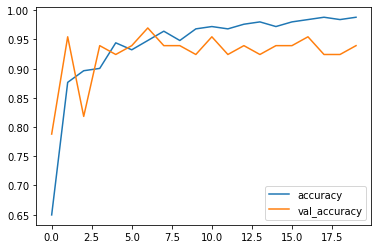

In [47]:

plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='lower right')

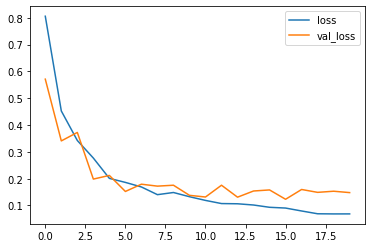

In [46]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.legend(['loss','val_loss'])

3/3 [==============================] - 2s 532ms/step


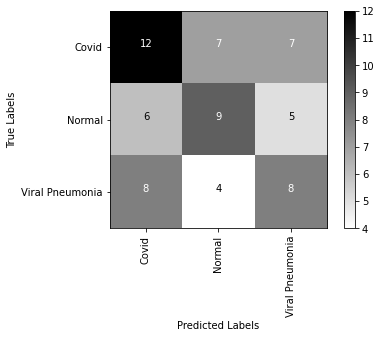

In [41]:
predY=model5.predict(test_ds)
y_pred=np.argmax(predY,axis=1)
cm2=confusion_matrix(y_pred,test_ds.labels)
#print(cm)


# Define class names
class_names = ["Covid" , "Normal", "Viral Pneumonia" ]

# Plot the confusion matrix using Matplotlib
plt.imshow(cm2, cmap='binary', interpolation='None')

# Add axis labels and a colorbar
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()

# Set the tick marks for the x and y axis
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

# Loop over the data and add the count to the plot
for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        plt.text(j, i, format(cm2[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm2[i, j] > cm2.max() / 2. else "black")

# Show the plot
plt.show()

In [42]:
print(classification_report(test_ds.labels,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.46      0.46        26
           1       0.45      0.45      0.45        20
           2       0.40      0.40      0.40        20

    accuracy                           0.44        66
   macro avg       0.44      0.44      0.44        66
weighted avg       0.44      0.44      0.44        66



**LAB-05:13:02:2022**

In [ ]:
import numpy as np
predict=np.argmax(model5.predict(test_ds),axis=1)
predict

3/3 [==============================] - 2s 572ms/step


array([1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 2])

In [ ]:
vall_loss, val_acc= model5.evaluate(test_ds,verbose=0)
print(vall_loss, val_acc)

0.1546570062637329 0.9242424368858337


**LAB-06:27:02:2023**

In [ ]:
#code by teacher to print confusion matrix
#predYY=model5.predict(test_ds)
#print(predYY)
#y_pred=np.argmax(predY,axis=1)
#print(y_pred)
#y_actual=np.argmax(y_rest,axis=1)
#y_actual=np.concatenate([y for x,y in test_ds],axis=0)
#cm=confusion_matrix(y_actual,y_pred.l)
#cm1=confusion_matrix(predYY,test_ds.labels)
#print(cm1)
#cm=confusion_matrix(test_ds.labels,y_pred)
#print(cm)